In [1]:
!pip install pycaret

     |████████████████████████████████| 266kB 5.8MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 14.2MB 310kB/s 
     |████████████████████████████████| 1.7MB 41.1MB/s 
     |████████████████████████████████| 6.8MB 42.6MB/s 
     |████████████████████████████████| 245kB 44.8MB/s 
     |████████████████████████████████| 276kB 35.1MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 215kB 44.2MB/s 
     |████████████████████████████████| 1.8MB 43.7MB/s 
     |████████████████████████████████| 1.1MB 45.8MB/s 
     |████████████████████████████████| 163kB 37.6MB/s 
     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 153kB 41.5MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 1.1MB 35.4MB/s 
     |████████████████████████████████| 3.2MB 44.2MB/s 
  

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age: age of the primary beneficiary

sex: insurance contractor gender - female, male

bmi: Body mass index, providing an understanding of body weights that are relatively high or low relative to height. An objective index of body weight (kg/m2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


there are 1338 records, and zero null values. Most real-world datasets have some null values and may require some feature engineering, but in this case we don't have to deal with that.

### **Exploratory Data Analysis (EDA)**

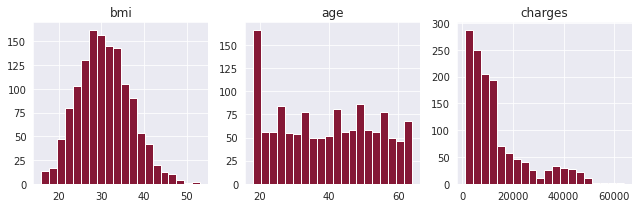

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
colors = ['#851836', '#EDBD17', '#0E1428', '#407076', '#4C5B61']
sns.set_palette(sns.color_palette(colors))
numerical = ['bmi', 'age', 'charges']
data[numerical].hist(bins=20, layout=(1, 3), figsize=(9,3))

plt.tight_layout()
plt.show()

The BMI variable has a distribution close to normal, while the charges variable is right-skewed. Skewed distributions can be a problem for machine learning algorithms, so we will deal with that later.

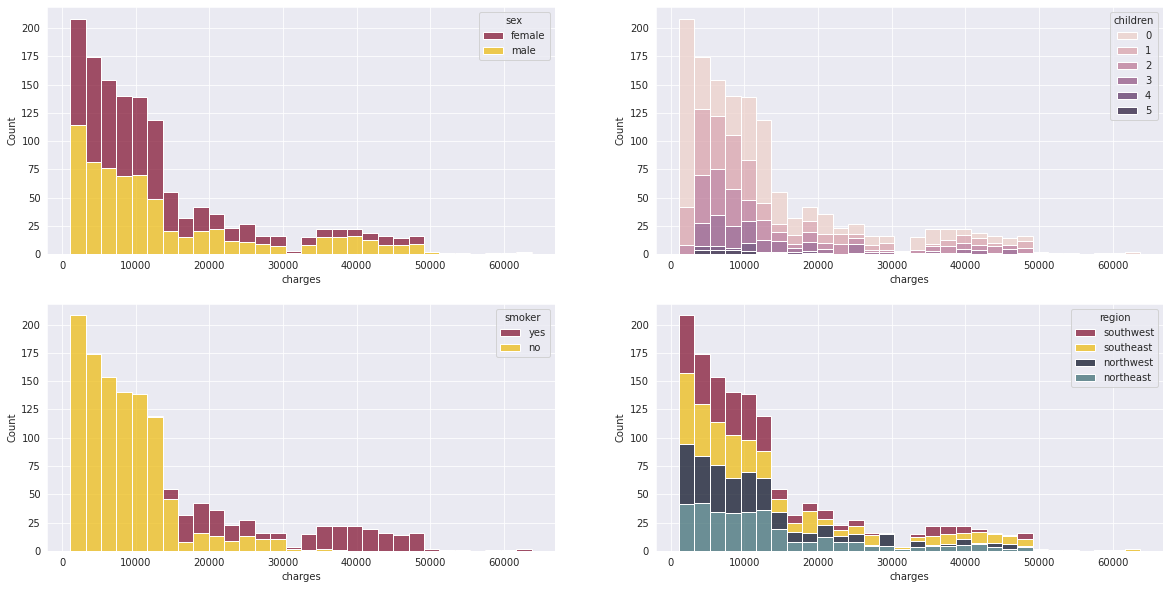

In [5]:
categorical = ['sex', 'children', 'smoker', 'region']

fig, axs = plt.subplots(2, 2, figsize=(20,10))

for variable, ax in zip(categorical, axs.flatten()):
  sns.histplot(data, x='charges', hue=variable, multiple='stack', ax=ax)

Smokers have significantly higher charges, and we can see that men have higher medical costs more often than women.

In [6]:
from pycaret.regression import *

reg = setup(
    data=data, 
    target='charges', 
    train_size=0.8, 
    session_id=10,
    normalize=True, 
    transform_target=True
)

,Description,Value
0,session_id,10
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1070, 14)"


1. Inferred data types

We can see that four features have been correctly identified as categorical, and the rest as numerical. In case PyCaret fails to do that correctly, we can define them in the setup() function ourselves, using the categorical_features and numeric_features parameters.

2. Train/Test Split The dataset has been split into a train and test set, as it is standard practice in machine learning. The train set size has been set to 80% of the original dataset, meaning that 80% of the data will be used to train the machine learning model and the rest for testing its accuracy.

3. Normalization of Numerical Features Many regression algorithms that require the features to be normalized for them to work as expected. Normalized features have μ=0 and σ=1. The standard method to accomplish that is to replace each value with its associated z-score, which is defined as z=x−μσ .

4. One-Hot Encoding of Categorical Features Some machine learning algorithms that accept categorical features and some that don't, so it is best to convert them to numerical features using one-hot encoding. One-hot encoding removes the categorical features and replaces them with additional binary variables, one for each category, minus one (to avoid the dummy variable trap).

5. Target Transformation As we've noticed in the EDA section, the target variable is right-skewed. This could cause problems as many regression algorithms expect the data to have a normal distribution to perform optimally. The setup() function includes the option to transform the target to have a distribution close to normal. Transformations can also be applied to the features if needed

The get_config('X') function returns the features dataset after the pre-processing pipeline has been applied to it:

In [7]:
get_config('X')

,age,bmi,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.423959,-0.457049,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.494665,0.498336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.787608,0.373013,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.434080,-1.302572,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.504786,-0.297547,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767917,0.042616,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1334,-1.494665,0.197235,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1335,-1.494665,0.999627,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1336,-1.282548,-0.798839,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


We can see that the numerical features have been normalized with the z-score method, and the categorical features have been encoded with one-hot encoding. It is important to verify that the pre-processing has been completed successfully, as in some cases, our dataset might not be as clean as the one used in this example. In case the pre-processing pipeline fails, we may get incorrect and unexpected results from the machine learning models.

In [8]:
best=compare_models(include = ['dt','rf','lr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2147.8559,2.080475e+07,4457.0909,0.8589,0.3823,0.1875,0.462
dt,Decision Tree Regressor,2893.4797,3.873123e+07,6175.2825,0.7313,0.5022,0.3202,0.289
lr,Linear Regression,4106.0350,6.490876e+07,7935.2934,0.5587,0.4259,0.2619,0.022


The create_model() function lets you create a regression model based on the algorithm of your preference. 

The create_model() function uses k-fold cross-validation to evaluate the model accuracy. In this method, the dataset is first partitioned into k subsamples, one subsample is retained for validation, and the rest is used to train the model. This process is repeated k times, and each subsample is used only once as validation data.

In [9]:
model = create_model('dt', cross_validation=True, fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2046.0859,2.215393e+07,4706.7956,0.7972,0.3768,0.2422
1,3502.4012,4.991280e+07,7064.8992,0.6151,0.6232,0.4109
2,3827.1615,5.753156e+07,7584.9561,0.6652,0.5050,0.3762
3,2850.4195,3.675204e+07,6062.3457,0.7997,0.5465,0.2914
4,3127.9932,4.146858e+07,6439.6104,0.7505,0.5298,0.3956
5,2234.9121,2.831665e+07,5321.3389,0.7513,0.4470,0.3212
6,2921.8267,3.710321e+07,6091.2401,0.6770,0.4702,0.2868
7,2630.8606,3.488290e+07,5906.1743,0.8048,0.4777,0.2444
8,3004.9251,4.266962e+07,6532.1986,0.6855,0.5468,0.2603
9,2788.2113,3.652107e+07,6043.2664,0.7668,0.4991,0.3731


After training the model, the cross-validation results are displayed. We set folds (k) to 10, so in this case, we have a ten-fold cross-validation. We can see the metrics for every fold, and the mean and standard deviation of all steps.

## **Tune Model**

The tune_model() function tunes the hyperparameters of a given model and outputs the results. Hyperparameters are model settings that can be modified and can have either a positive or negative effect in their accuracy.

tune_model() uses the Random Grid Search method to tune and optimize the model by testing a random sample of the hyperparameters. We can define a grid with specific values for the hyperparameters by using the custom_grid parameter.

We can also define the number of iterations with the n_iter parameter. A random value from the defined grid of hyperparameters is selected for every iteration and tested using k-fold cross-validation.

In [12]:

tuned_model = tune_model(
    model, 
    fold=10,
    n_iter=20
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1441.7570,4.898942e+06,2213.3553,0.9552,0.2676,0.1869
1,2794.4735,3.228608e+07,5682.0842,0.7510,0.5117,0.2154
2,2758.3360,2.972661e+07,5452.2116,0.8270,0.3800,0.2306
3,2333.8797,2.299677e+07,4795.4944,0.8747,0.4608,0.1879
4,2115.9414,1.698538e+07,4121.3325,0.8978,0.3391,0.1917
5,1829.8669,1.325194e+07,3640.3209,0.8836,0.3079,0.2004
6,2426.0026,1.840770e+07,4290.4196,0.8397,0.3865,0.2349
7,2530.2129,2.925082e+07,5408.4023,0.8364,0.4078,0.1774
8,2571.7943,2.857111e+07,5345.1949,0.7894,0.4817,0.2167
9,1622.4660,1.159093e+07,3404.5456,0.9260,0.2732,0.1596


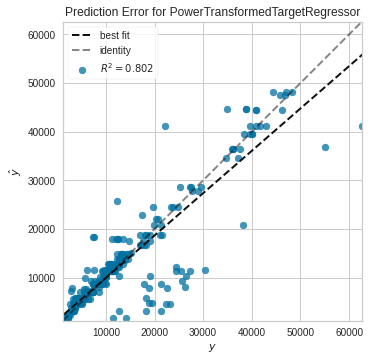

In [13]:
plot_model(tuned_model, plot='error')

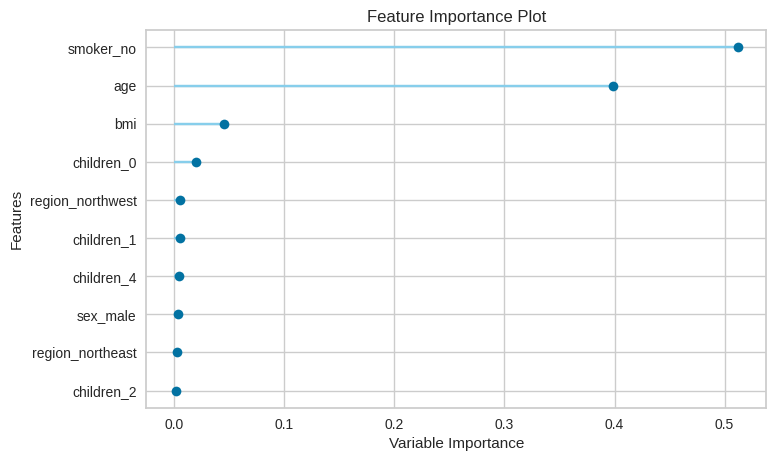

In [14]:
plot_model(tuned_model, plot='feature')

In the EDA section above, we saw that being a smoker leads to significantly higher insurance charges, and now from the feature importance chart we see that being a smoker has the highest predictive value. Furthermore, we can also see that age and BMI seem to play an important role as well.

In [15]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,2640.6582,2.772690e+07,5265.6339,0.8023,0.429,0.2014


,age,bmi,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-0.151257,-0.483090,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7281.505371,7065.026363
1,-0.221963,-0.622247,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5267.818359,5674.344945
2,1.404268,1.040316,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12347.171875,25747.299794
3,1.545679,-0.916024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,24513.091797,12190.640229
4,-0.716903,-0.761404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3736.464600,3742.175966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.767917,0.568321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42856.839844,41273.704332
264,-0.929020,1.542423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3201.245117,5670.276697
265,-1.423959,-0.560399,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,22493.660156,7798.006901
266,1.262856,1.666118,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,11566.300781,11434.727677


In [16]:
final_model = finalize_model(tuned_model)

In [17]:
save_model(final_model,'FinalModel')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                                  presort='deprecated',
                                                  random_state=10,
                                                  regressor=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             